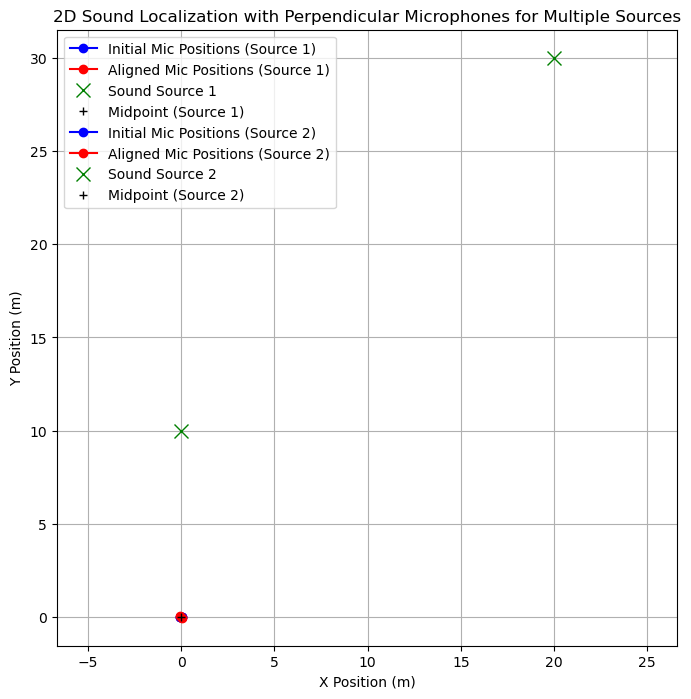

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
from IPython.display import Audio
from scipy import signal

# Microphone positions
mic1_initial = np.array([-0.06, 0])   # Mic 1 at [-1, 0]
mic2_initial = np.array([0.06, 0])    # Mic 2 at [1, 0]
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between mic 1 and mic 2

# Sound source positions
sound_sources = [np.array([0, 10]), np.array([20, 30])]  # Add multiple sound sources

# Function to rotate microphones
def mic_rotation(angle_to_rotate, sound_source, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic1_rotated, mic2_rotated

# Calculate and plot microphone rotations for each sound source
plt.figure(figsize=(8, 8))
for i, sound_source in enumerate(sound_sources):
    angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])
    mic1_rotated, mic2_rotated = mic_rotation(angle_diff, sound_source, midpoint)

    # Plot initial and rotated microphone positions
    plt.plot([mic1_initial[0], mic2_initial[0]], [mic1_initial[1], mic2_initial[1]], 'bo-', label=f"Initial Mic Positions (Source {i + 1})")
    plt.plot([mic1_rotated[0], mic2_rotated[0]], [mic1_rotated[1], mic2_rotated[1]], 'ro-', label=f"Aligned Mic Positions (Source {i + 1})")
    plt.plot(sound_source[0], sound_source[1], 'gx', label=f"Sound Source {i + 1}", markersize=10)
    plt.plot(midpoint[0], midpoint[1], 'k+', label=f"Midpoint (Source {i + 1})")

plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones for Multiple Sources")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [75]:
# # Load audio file and display it

# folder_path = r'Bird_sound'
# filename = "call1 (2).wav"
# file_path = os.path.join(folder_path, filename)

# SR, y = wavfile.read(file_path)
# display(Audio(y, rate=SR))

# # Constants for loss calculation
# SOUND_SPEED = 343.2
#   # Updated sound source position
# y1_all = []
# y2_all = []
# # Loss calculation function for a range of angles
# def loss_angle(angle_to_rotate):
#     mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

#     dist_to_mic1 = np.linalg.norm(sound_source - mic1_rotated)
#     dist_to_mic2 = np.linalg.norm(sound_source - mic2_rotated)
    
#     t_to_mic1 = dist_to_mic1 / SOUND_SPEED
#     t_to_mic2 = dist_to_mic2 / SOUND_SPEED
    
#     samples_at_mic1 = int(t_to_mic1 * SR)
#     samples_at_mic2 = int(t_to_mic2 * SR)
    
#     y1 = y[samples_at_mic1:-samples_at_mic2]
#     y2 = y[samples_at_mic2:-samples_at_mic1]

#     sos = signal.butter(1, 500, 'lp', fs=SR, output='sos')
#     y1 = signal.sosfilt(sos, y1)
#     y2 = signal.sosfilt(sos, y2)

#     y1_all.append(y1)
#     y2_all.append(y2)
    
#     # Calculate the loss
#     loss = np.linalg.norm(y1 - y2)
#     return loss

# # Calculate and plot loss for a range of angles
# angles = np.linspace(-np.pi/2, np.pi/2, 501)
# losses = np.array([loss_angle(a) for a in angles])


# sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
# sig = signal.sosfilt(sos, losses)

# plt.figure()
# plt.plot(np.degrees(angles), losses)
# plt.plot(np.degrees(angles), sig)
# plt.xlabel("Angle (degrees)")
# plt.ylabel("Loss")
# plt.title("Loss vs. Rotation Angle")
# plt.show()

# # Display the final rotated microphone positions
# print("Rotated Microphone Positions (Perpendicular):")
# print("Mic 1:", mic1_rotated)
# print("Mic 2:", mic2_rotated)


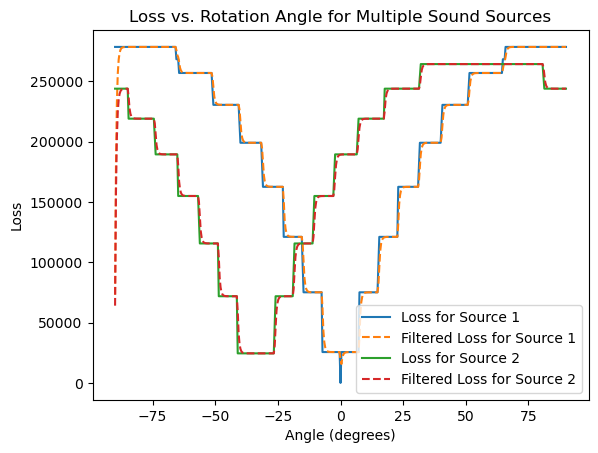

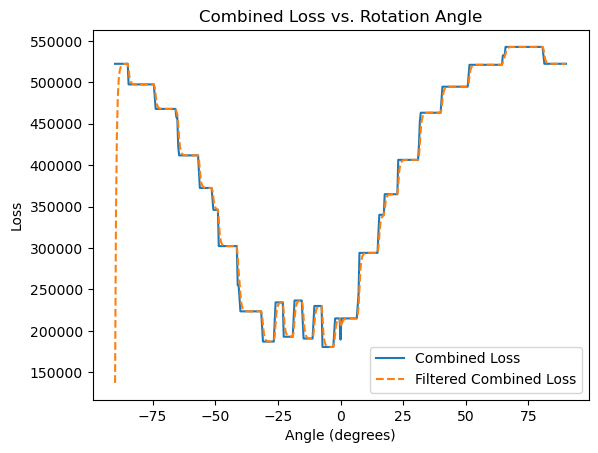

In [11]:
def loss_angle(angle_to_rotate, sound_source):
    mic1_rotated, mic2_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic1 = np.linalg.norm(sound_source - mic1_rotated)
    dist_to_mic2 = np.linalg.norm(sound_source - mic2_rotated)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1 = int(t_to_mic1 * SR)
    samples_at_mic2 = int(t_to_mic2 * SR)

    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    sos = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y1 = signal.sosfilt(sos, y1)
    y2 = signal.sosfilt(sos, y2)

    loss = np.linalg.norm(y1 - y2)
    return loss

# Constants for loss calculation
SOUND_SPEED = 343.2

# Load audio file and display it
folder_path = r'Bird_sound'
filename = "piano.wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
#display(Audio(y, rate=SR))

angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum = np.zeros_like(angles)
loss_sum_array = np.zeros_like(angles)

plt.figure()
for i, sound_source in enumerate(sound_sources):
    losses = np.array([loss_angle(a, sound_source) for a in angles])
    loss_sum += losses
    loss_sum_array += losses

    sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    sig = signal.sosfilt(sos, losses)

    plt.plot(np.degrees(angles), losses, label=f"Loss for Source {i + 1}")
    plt.plot(np.degrees(angles), sig, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.show()

# Plot the combined loss from both sound sources
plt.figure()
sos = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
loss_sum_filtered = signal.sosfilt(sos, loss_sum)
plt.plot(np.degrees(angles), loss_sum, label="Combined Loss")
plt.plot(np.degrees(angles), loss_sum_filtered, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.show()

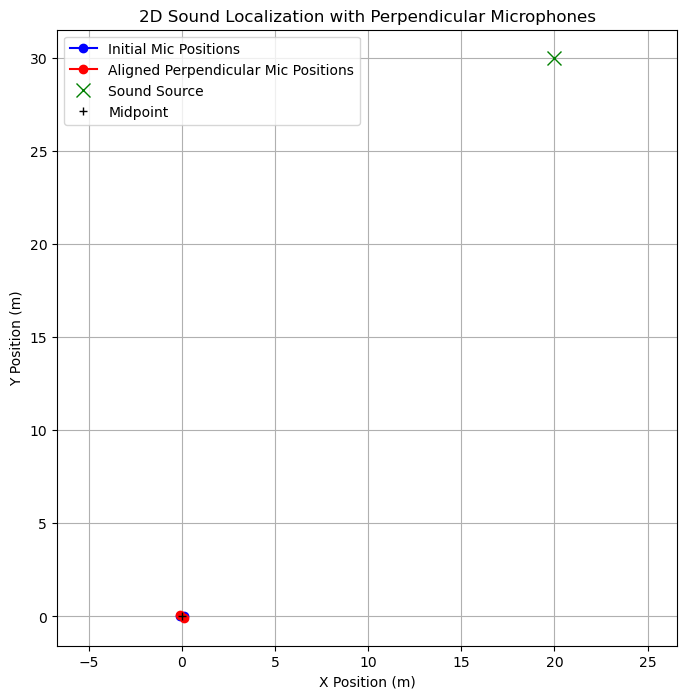

In [103]:
# Microphone positions
mic3_initial = np.array([-0.12, 0])   # Mic 1 at [-1, 0]
mic4_initial = np.array([0.12, 0])    # Mic 2 at [1, 0]
mic_distance_34 = np.linalg.norm(mic4_initial - mic3_initial)  # Distance between microphones
midpoint_34 = (mic4_initial + mic3_initial) / 2  # Midpoint between mic 1 and mic 2

# Angle from midpoint to sound source

angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])


# Function to rotate microphones and calculate alignment loss
def mic_rotation(angle_to_rotate, sound_source, midpoint_34):
    mic3_rotated = midpoint_34 + (mic_distance_34 / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic4_rotated = midpoint_34 + (-mic_distance_34 / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic3_rotated, mic4_rotated

mic3_rotated, mic4_rotated = mic_rotation(angle_diff, sound_source, midpoint)
# Plotting the initial and aligned microphone positions
plt.figure(figsize=(8, 8))
plt.plot([mic3_initial[0], mic4_initial[0]], [mic3_initial[1], mic4_initial[1]], 'bo-', label="Initial Mic Positions")
plt.plot([mic3_rotated[0], mic4_rotated[0]], [mic3_rotated[1], mic4_rotated[1]], 'ro-', label="Aligned Perpendicular Mic Positions")
plt.plot(sound_source[0], sound_source[1], 'gx', label="Sound Source", markersize=10)
plt.plot(midpoint_34[0], midpoint_34[1], 'k+', label="Midpoint")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

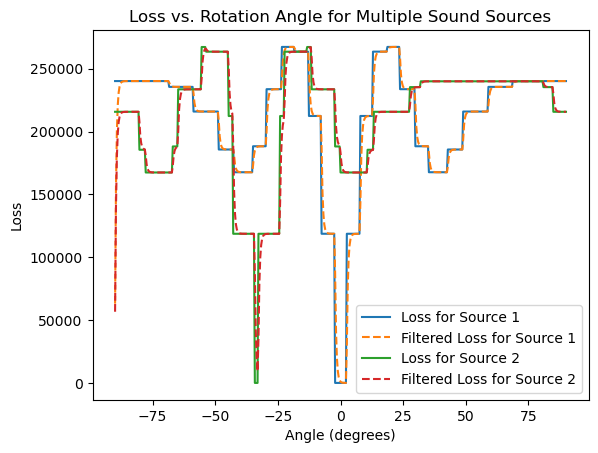

In [105]:
def loss_angle(angle_to_rotate, sound_source):
    mic3_rotated, mic4_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic3 = np.linalg.norm(sound_source - mic3_rotated)
    dist_to_mic4 = np.linalg.norm(sound_source - mic4_rotated)

    t_to_mic3 = dist_to_mic3 / SOUND_SPEED
    t_to_mic4 = dist_to_mic4 / SOUND_SPEED

    samples_at_mic3 = int(t_to_mic3 * SR)
    samples_at_mic4 = int(t_to_mic4 * SR)

    y3 = y[samples_at_mic3:-samples_at_mic4]
    y4 = y[samples_at_mic4:-samples_at_mic3]

    sos_34 = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y3 = signal.sosfilt(sos_34, y3)
    y4 = signal.sosfilt(sos_34, y4)

    loss_34 = np.linalg.norm(y3 - y4)
    return loss_34

# Constants for loss calculation
SOUND_SPEED = 343.2

# Load audio file and display it
folder_path = r'Bird_sound'
filename = "call1 (2).wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
display(Audio(y, rate=SR))

angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum_34 = np.zeros_like(angles)
loss_sum_array = np.zeros_like(angles)

plt.figure()
for i, sound_source in enumerate(sound_sources):
    losses_34 = np.array([loss_angle(a, sound_source) for a in angles])
    loss_sum_34 += losses_34
    loss_sum_array += losses_34

    sos_34 = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    sig_34 = signal.sosfilt(sos_34, losses_34)

    plt.plot(np.degrees(angles), losses_34, label=f"Loss for Source {i + 1}")
    plt.plot(np.degrees(angles), sig_34, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.show()

# Plot the combined loss from both sound sources
plt.figure()
sos_34 = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
loss_sum_filtered_34 = signal.sosfilt(sos_34, loss_sum_34)
plt.plot(np.degrees(angles), loss_sum_34, label="Combined Loss")
plt.plot(np.degrees(angles), loss_sum_filtered_34, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.show()


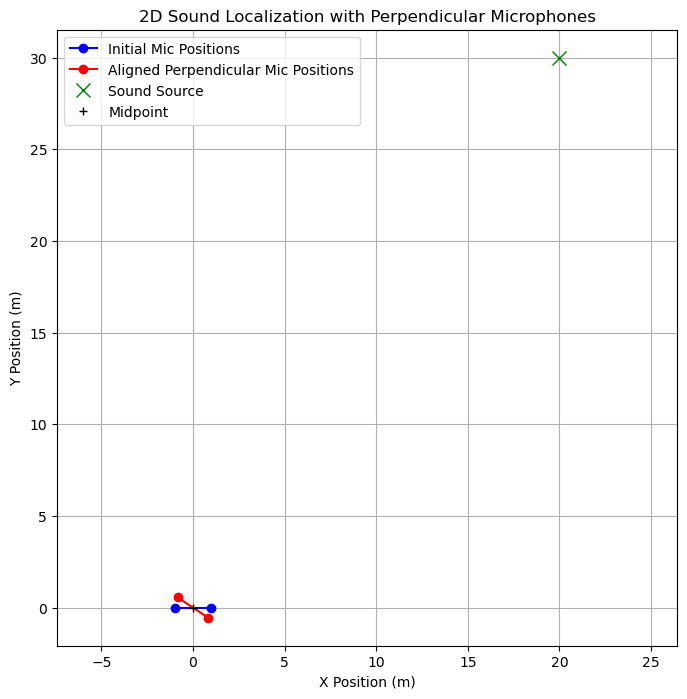

In [106]:
# Microphone positions
mic5_initial = np.array([-1, 0])   # Mic 5 at [-1, 0]
mic6_initial = np.array([1, 0])    # Mic 6 at [1, 0]
mic_distance_56 = np.linalg.norm(mic6_initial - mic5_initial)  # Distance between microphones
midpoint_56 = (mic6_initial + mic5_initial) / 2  # Midpoint between mic 5 and mic 6

# Angle from midpoint to sound source

angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])


# Function to rotate microphones and calculate alignment loss
def mic_rotation(angle_to_rotate, sound_source, midpoint_56):
    mic5_rotated = midpoint_56 + (mic_distance_56 / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic6_rotated = midpoint_56 + (-mic_distance_56 / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic5_rotated, mic6_rotated

mic5_rotated, mic6_rotated = mic_rotation(angle_diff, sound_source, midpoint)
# Plotting the initial and aligned microphone positions
plt.figure(figsize=(8, 8))
plt.plot([mic5_initial[0], mic6_initial[0]], [mic5_initial[1], mic6_initial[1]], 'bo-', label="Initial Mic Positions")
plt.plot([mic5_rotated[0], mic6_rotated[0]], [mic5_rotated[1], mic6_rotated[1]], 'ro-', label="Aligned Perpendicular Mic Positions")
plt.plot(sound_source[0], sound_source[1], 'gx', label="Sound Source", markersize=10)
plt.plot(midpoint_56[0], midpoint_56[1], 'k+', label="Midpoint")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

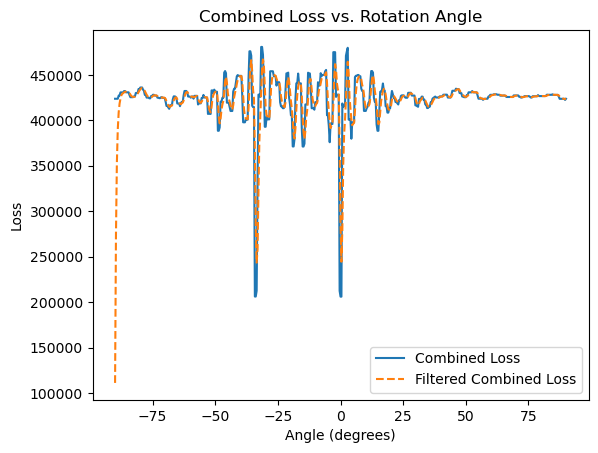

In [107]:
def loss_angle(angle_to_rotate, sound_source):
    mic5_rotated, mic6_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic5 = np.linalg.norm(sound_source - mic5_rotated)
    dist_to_mic6 = np.linalg.norm(sound_source - mic6_rotated)

    t_to_mic5 = dist_to_mic5 / SOUND_SPEED
    t_to_mic6 = dist_to_mic6 / SOUND_SPEED

    samples_at_mic5 = int(t_to_mic5 * SR)
    samples_at_mic6 = int(t_to_mic6 * SR)

    y5 = y[samples_at_mic5:-samples_at_mic6]
    y6 = y[samples_at_mic6:-samples_at_mic5]

    sos_56 = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y5 = signal.sosfilt(sos_56, y5)
    y6 = signal.sosfilt(sos_56, y6)

    loss_56 = np.linalg.norm(y5 - y6)
    return loss_56

# Constants for loss calculation
SOUND_SPEED = 343.2

# Load audio file and display it
folder_path = r'Bird_sound'
filename = "call1 (2).wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
display(Audio(y, rate=SR))

angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum_56 = np.zeros_like(angles)
loss_sum_array = np.zeros_like(angles)

plt.figure()
for i, sound_source in enumerate(sound_sources):
    losses_56 = np.array([loss_angle(a, sound_source) for a in angles])
    loss_sum_56 += losses_56
    loss_sum_array += losses_56

    sos_56 = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    sig_56 = signal.sosfilt(sos_56, losses_56)

    plt.plot(np.degrees(angles), losses_56, label=f"Loss for Source {i + 1}")
    plt.plot(np.degrees(angles), sig_56, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.show()

# Plot the combined loss from both sound sources
plt.figure()
sos_56 = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
loss_sum_filtered_56 = signal.sosfilt(sos_56, loss_sum_56)
plt.plot(np.degrees(angles), loss_sum_56, label="Combined Loss")
plt.plot(np.degrees(angles), loss_sum_filtered_56, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.show()


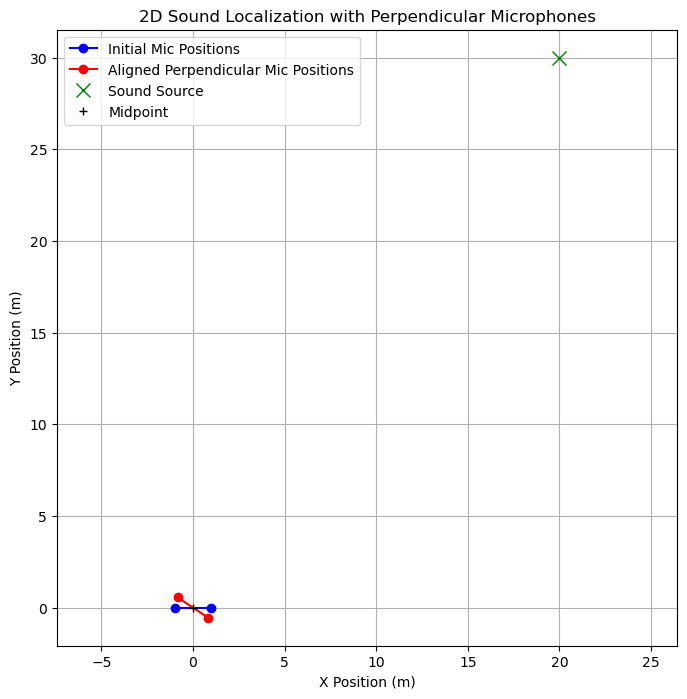

In [108]:
# Microphone positions
mic7_initial = np.array([-1, 0])   # Mic 5 at [-1, 0]
mic8_initial = np.array([1, 0])    # Mic 6 at [1, 0]
mic_distance_78 = np.linalg.norm(mic8_initial - mic7_initial)  # Distance between microphones
midpoint_78 = (mic8_initial + mic7_initial) / 2  # Midpoint between mic 5 and mic 6

# Angle from midpoint to sound source

angle_diff = -np.arctan2(sound_source[0] - midpoint[0], sound_source[1] - midpoint[1])


# Function to rotate microphones and calculate alignment loss
def mic_rotation(angle_to_rotate, sound_source, midpoint_78):
    mic7_rotated = midpoint_78 + (mic_distance_78 / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic8_rotated = midpoint_78 + (-mic_distance_78 / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])

    return mic7_rotated, mic8_rotated

mic7_rotated, mic8_rotated = mic_rotation(angle_diff, sound_source, midpoint)
# Plotting the initial and aligned microphone positions
plt.figure(figsize=(8, 8))
plt.plot([mic7_initial[0], mic8_initial[0]], [mic7_initial[1], mic8_initial[1]], 'bo-', label="Initial Mic Positions")
plt.plot([mic7_rotated[0], mic8_rotated[0]], [mic7_rotated[1], mic8_rotated[1]], 'ro-', label="Aligned Perpendicular Mic Positions")
plt.plot(sound_source[0], sound_source[1], 'gx', label="Sound Source", markersize=10)
plt.plot(midpoint_78[0], midpoint_78[1], 'k+', label="Midpoint")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("2D Sound Localization with Perpendicular Microphones")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

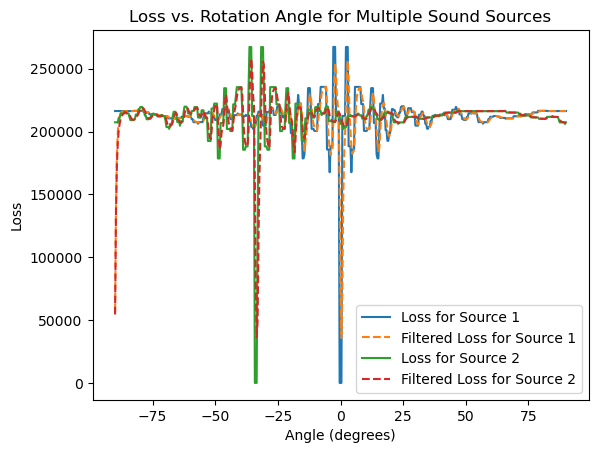

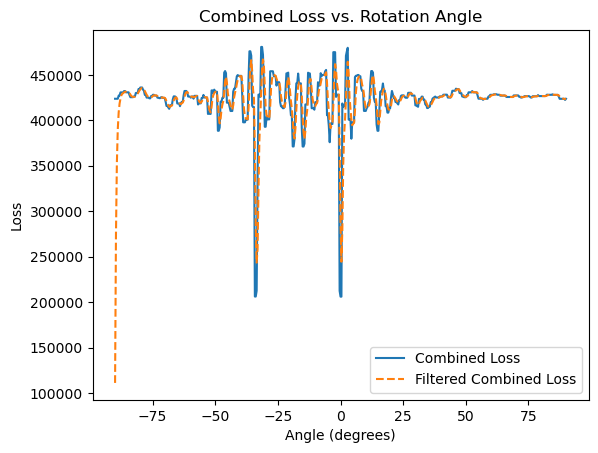

In [109]:
def loss_angle(angle_to_rotate, sound_source):
    mic7_rotated, mic8_rotated = mic_rotation(angle_to_rotate, sound_source, midpoint)

    dist_to_mic5 = np.linalg.norm(sound_source - mic7_rotated)
    dist_to_mic6 = np.linalg.norm(sound_source - mic8_rotated)

    t_to_mic5 = dist_to_mic5 / SOUND_SPEED
    t_to_mic6 = dist_to_mic6 / SOUND_SPEED

    samples_at_mic5 = int(t_to_mic5 * SR)
    samples_at_mic6 = int(t_to_mic6 * SR)

    y5 = y[samples_at_mic5:-samples_at_mic6]
    y6 = y[samples_at_mic6:-samples_at_mic5]

    sos_78 = signal.butter(1, 500, 'lp', fs=SR, output='sos')
    y5 = signal.sosfilt(sos_78, y5)
    y6 = signal.sosfilt(sos_78, y6)

    loss_78 = np.linalg.norm(y5 - y6)
    return loss_78

# Constants for loss calculation
SOUND_SPEED = 343.2

# Load audio file and display it
folder_path = r'Bird_sound'
filename = "call1 (2).wav"
file_path = os.path.join(folder_path, filename)

SR, y = wavfile.read(file_path)
display(Audio(y, rate=SR))

angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum_78 = np.zeros_like(angles)
loss_sum_array = np.zeros_like(angles)

plt.figure()
for i, sound_source in enumerate(sound_sources):
    losses_78 = np.array([loss_angle(a, sound_source) for a in angles])
    loss_sum_78 += losses_78
    loss_sum_array += losses_78

    sos_78 = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    sig_78 = signal.sosfilt(sos_78, losses_78)

    plt.plot(np.degrees(angles), losses_78, label=f"Loss for Source {i + 1}")
    plt.plot(np.degrees(angles), sig_78, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Multiple Sound Sources")
plt.legend()
plt.show()

# Plot the combined loss from both sound sources
plt.figure()
sos_78 = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
loss_sum_filtered_78 = signal.sosfilt(sos_78, loss_sum_78)
plt.plot(np.degrees(angles), loss_sum_78, label="Combined Loss")
plt.plot(np.degrees(angles), loss_sum_filtered_78, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.show()


In [1]:
plt.figure()
#sos_sum_array = signal.butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
#loss_sum_filtered_array = signal.sosfilt(sos_array, loss_sum_array)
plt.plot(np.degrees(angles), loss_sum_array, label="Combined Loss")
#plt.plot(np.degrees(angles), loss_sum_filtered_array, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

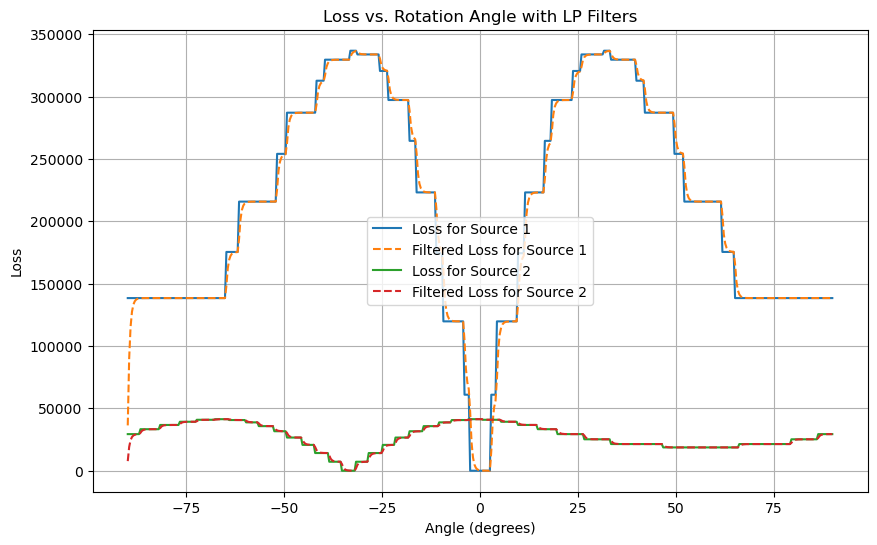

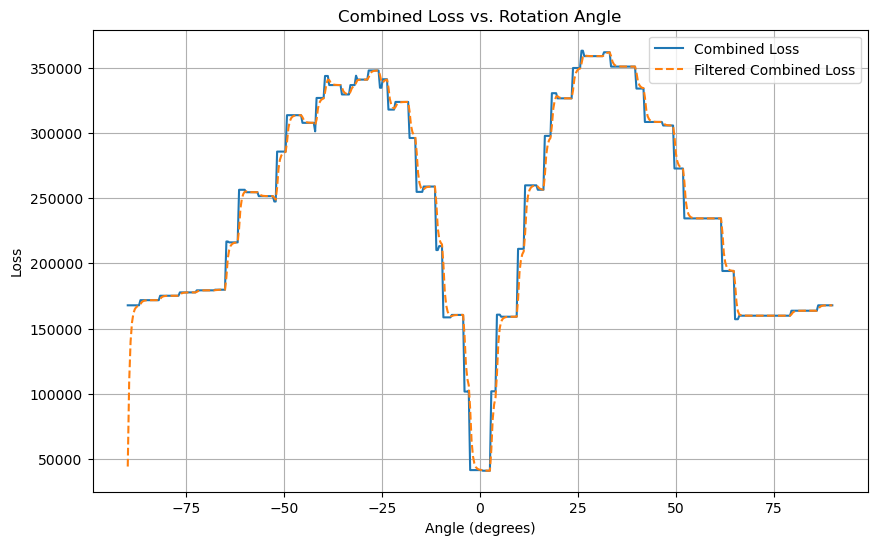

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram, butter, sosfilt
from IPython.display import Audio

# Constants
SOUND_SPEED = 343.2  # Speed of sound (m/s)

# Microphone positions
mic1_initial = np.array([-0.06, 0])  # Mic 1 initial position
mic2_initial = np.array([0.06, 0])   # Mic 2 initial position
mic_distance = np.linalg.norm(mic2_initial - mic1_initial)  # Distance between microphones
midpoint = (mic1_initial + mic2_initial) / 2  # Midpoint between microphones

# Sound source positions
sound_sources = [np.array([0, 10]), np.array([20, 30])]


# Define LPF parameters for each microphone pair
lpf_params = {
    "mic_pair_1": {"cutoff": 500, "order": 1},
    "mic_pair_2": {"cutoff": 400, "order": 2},
    "mic_pair_3": {"cutoff": 300, "order": 3}
}

#LPF
def apply_lpf(signal_data, cutoff, order, fs):

    sos = butter(order, cutoff, 'lp', fs=fs, output='sos')
    return sosfilt(sos, signal_data)

# Mic rotation
def mic_rotation(angle_to_rotate, sound_source, midpoint):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    return mic1_rotated, mic2_rotated

# Loss 
def loss_angle_with_lpf(angle_to_rotate, sound_source, mic_rotation_fn, lpf_params, midpoint, mic_distance):
    mic_rotated1, mic_rotated2 = mic_rotation_fn(angle_to_rotate, sound_source, midpoint)

    dist_to_mic1 = np.linalg.norm(sound_source - mic_rotated1)
    dist_to_mic2 = np.linalg.norm(sound_source - mic_rotated2)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1 = int(t_to_mic1 * SR)
    samples_at_mic2 = int(t_to_mic2 * SR)

    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    # Apply LPF with specific parameters
    y1 = apply_lpf(y1, lpf_params["cutoff"], lpf_params["order"], fs=SR)
    y2 = apply_lpf(y2, lpf_params["cutoff"], lpf_params["order"], fs=SR)

    loss = np.linalg.norm(y1 - y2)
    return loss

# Load audio file
folder_path = r'Bird_sound'
filename = "call1.wav"  # Replace with the appropriate audio file
file_path = os.path.join(folder_path, filename)
SR, y = wavfile.read(file_path)

# Display the audio
display(Audio(y, rate=SR))

# Angles for microphone rotation
angles = np.linspace(-np.pi/2, np.pi/2, 501)
loss_sum = np.zeros_like(angles)

# Main loop to compute losses for all sound sources
plt.figure(figsize=(10, 6))
for i, sound_source in enumerate(sound_sources):
    pair_key = f"mic_pair_{i + 1}"  # Access the correct LPF parameters for the pair
    params = lpf_params[pair_key]

    losses = np.array([
        loss_angle_with_lpf(a, sound_source, mic_rotation, params, midpoint, mic_distance)
        for a in angles
    ])
    loss_sum += losses

    # Apply a smoothing filter for visualisation
    sos = butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    sig = sosfilt(sos, losses)

    # Plot individual and filtered losses
    plt.plot(np.degrees(angles), losses, label=f"Loss for Source {i + 1}")
    plt.plot(np.degrees(angles), sig, linestyle='--', label=f"Filtered Loss for Source {i + 1}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle with LP Filters")
plt.legend()
plt.grid()
plt.show()

# Plot the combined loss for all sound sources
plt.figure(figsize=(10, 6))
loss_sum_filtered = sosfilt(sos, loss_sum)
plt.plot(np.degrees(angles), loss_sum, label="Combined Loss")
plt.plot(np.degrees(angles), loss_sum_filtered, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.grid()
plt.show()


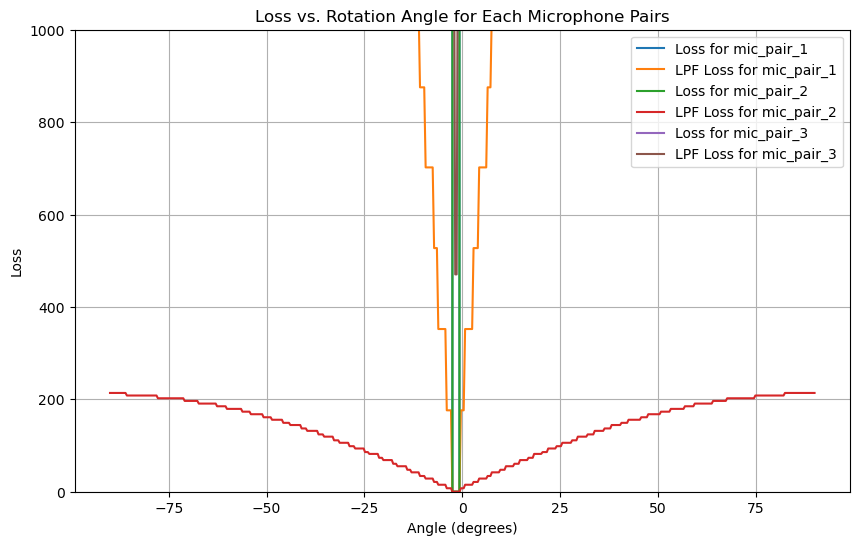

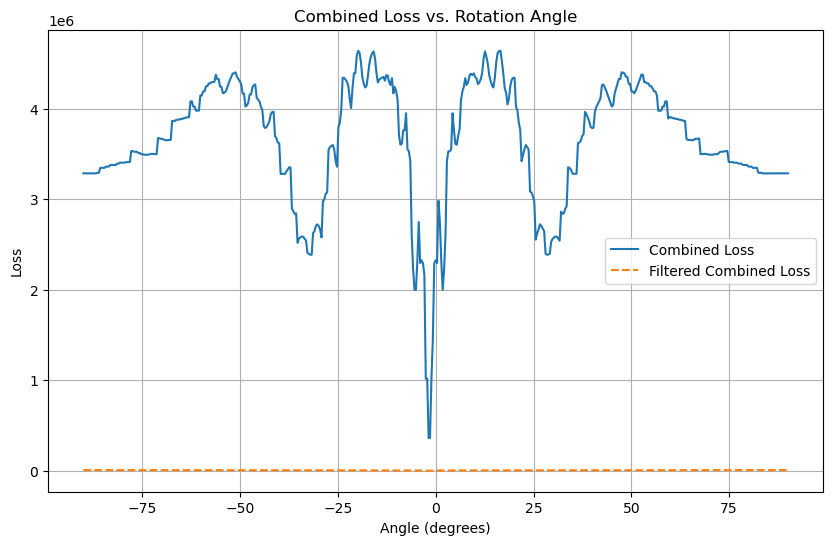

In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, sosfilt
from IPython.display import Audio

# Constants
SOUND_SPEED = 343.2  # Speed of sound (m/s)

# Sound source position
sound_source = np.array([3, 100])

# Microphone pairs
mic_pairs = {
    "mic_pair_1": {
        "positions": [np.array([-0.12, 0]), np.array([0.12, 0])],
        "lpf_params": {"cutoff": 600, "order": 10}
    },
    "mic_pair_2": {
        "positions": [np.array([-0.12, 0]), np.array([0.12, 0])],
        "lpf_params": {"cutoff": 250, "order": 10}
    },
    "mic_pair_3": {
        "positions": [np.array([-1, 0]), np.array([1, 0])],
        "lpf_params": {"cutoff": 300, "order": 3}
    }
}

# Function to apply a low-pass filter
def apply_lpf(signal_data, cutoff, order, fs):
    sos = butter(order, cutoff, 'lp', fs=fs, output='sos')
    return sosfilt(sos, signal_data)

# Function to rotate microphones
def mic_rotation(angle_to_rotate, midpoint, mic_distance):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    return mic1_rotated, mic2_rotated

# Function to calculate alignment loss with LPF
def loss_angle_with_lpf(angle_to_rotate, sound_source, mic_positions, lpf_params, fs):
    mic1, mic2 = mic_positions
    midpoint = (mic1 + mic2) / 2
    mic_distance = np.linalg.norm(mic2 - mic1)

    mic_rotated1, mic_rotated2 = mic_rotation(angle_to_rotate, midpoint, mic_distance)

    dist_to_mic1 = np.linalg.norm(sound_source - mic_rotated1)
    dist_to_mic2 = np.linalg.norm(sound_source - mic_rotated2)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1 = int(t_to_mic1 * fs)
    samples_at_mic2 = int(t_to_mic2 * fs)

    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    # Apply LPF with specific parameters
    y1_lpf = apply_lpf(y1, lpf_params["cutoff"], lpf_params["order"], fs)
    y2_lpf = apply_lpf(y2, lpf_params["cutoff"], lpf_params["order"], fs)

    loss = np.linalg.norm(y1 - y2)
    loss_lpf = np.linalg.norm(y1_lpf - y2_lpf)
    return loss, loss_lpf

# Load audio file
folder_path = r'Bird_sound'
filename = "call1.wav"  # Replace with the appropriate audio file
file_path = os.path.join(folder_path, filename)
SR, y = wavfile.read(file_path)

# Display the audio
display(Audio(y, rate=SR))

# Angles for microphone rotation
angles = np.linspace(-np.pi/2, np.pi/2, 501)

# Main loop to compute losses for all microphone pairs
plt.figure(figsize=(10, 6))
loss_sum = np.zeros_like(angles)
loss_lpf_sum = np.zeros_like(angles)

for pair_name, pair_data in mic_pairs.items():
    mic_positions = pair_data["positions"]
    lpf_params = pair_data["lpf_params"]
    
    loss_pair_sum = np.zeros_like(angles)
    loss_pair_lpf_sum = np.zeros_like(angles)
    
    for i, a in enumerate(angles):
        loss, loss_lpf = loss_angle_with_lpf(a, sound_source, mic_positions, lpf_params, SR)
        # losses = np.array([loss_angle_with_lpf(a, sound_source, mic_positions, lpf_params, SR)])
        loss_pair_sum[i] += loss
        loss_pair_lpf_sum[i] += loss_lpf

    # # Apply a smoothing filter for visualisation
    # sos = butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    # sig = sosfilt(sos, losses)

    loss_sum += loss_pair_sum
    loss_lpf_sum += loss_pair_lpf_sum
    
    # Plot individual and filtered losses
    plt.plot(np.degrees(angles), loss_pair_sum, label=f"Loss for {pair_name}")
    plt.plot(np.degrees(angles), loss_pair_lpf_sum, label=f"LPF Loss for {pair_name}")
    # plt.plot(np.degrees(angles), sig, linestyle='--', label=f"Filtered Loss for {pair_name}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Each Microphone Pairs")
plt.legend()
plt.grid()
plt.ylim([0, 1000])
plt.show()


# Plot the combined loss for all microphone pairs
plt.figure(figsize=(10, 6))
# loss_sum_filtered = sosfilt(sos, loss_sum)
plt.plot(np.degrees(angles), loss_sum, label="Combined Loss")
plt.plot(np.degrees(angles), loss_lpf_sum, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.grid()
plt.show()


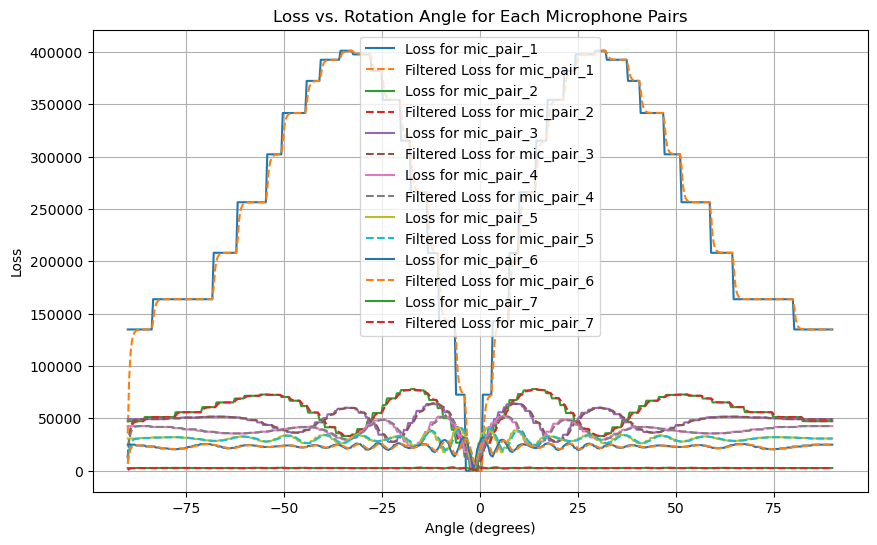

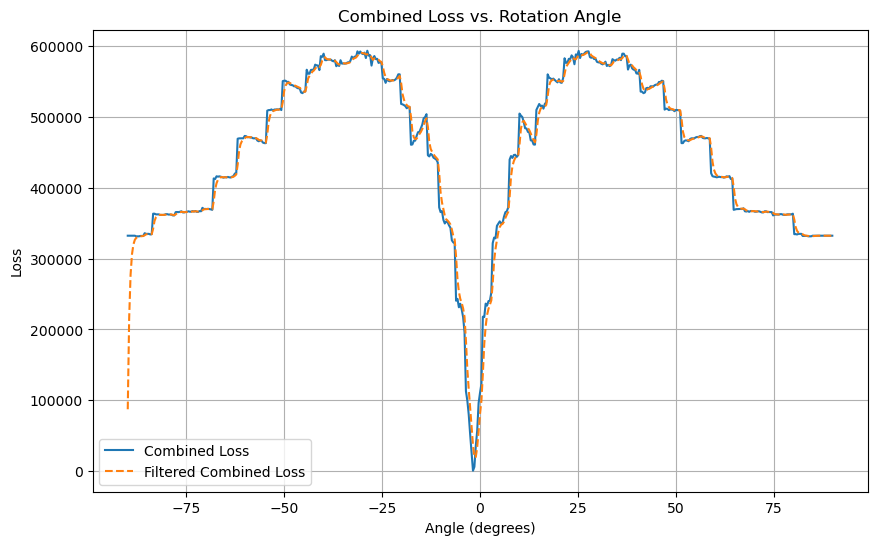

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, sosfilt
from IPython.display import Audio

# Constants
SOUND_SPEED = 343.2  # Speed of sound (m/s)

# Sound source position
sound_source = np.array([3, 100])

# Microphone pairs
mic_pairs = {
    "mic_pair_1": {
        "positions": [np.array([-0.06, 0]), np.array([0.06, 0])],
        "lpf_params": {"cutoff": 600, "order": 1}
    },
    "mic_pair_2": {
        "positions": [np.array([-0.12, 0]), np.array([0.12, 0])],
        "lpf_params": {"cutoff": 550, "order": 2}
    },
    "mic_pair_3": {
        "positions": [np.array([-0.18, 0]), np.array([0.18, 0])],
        "lpf_params": {"cutoff": 500, "order": 2}
    },
    "mic_pair_4": {
        "positions": [np.array([-0.24, 0]), np.array([0.24, 0])],
        "lpf_params": {"cutoff": 450, "order": 2}
    },
    "mic_pair_5": {
        "positions": [np.array([-0.5, 0]), np.array([0.5, 0])],
        "lpf_params": {"cutoff": 400, "order": 2}
    },
    "mic_pair_6": {
        "positions": [np.array([-0.75, 0]), np.array([0.75, 0])],
        "lpf_params": {"cutoff": 350, "order": 2}
    },
    "mic_pair_7": {
        "positions": [np.array([-1, 0]), np.array([1, 0])],
        "lpf_params": {"cutoff": 300, "order": 3}
    }
}

# Function to apply a low-pass filter
def apply_lpf(signal_data, cutoff, order, fs):
    sos = butter(order, cutoff, 'lp', fs=fs, output='sos')
    return sosfilt(sos, signal_data)

# Function to rotate microphones
def mic_rotation(angle_to_rotate, midpoint, mic_distance):
    mic1_rotated = midpoint + (mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    mic2_rotated = midpoint + (-mic_distance / 2) * np.array([np.cos(angle_to_rotate), np.sin(angle_to_rotate)])
    return mic1_rotated, mic2_rotated

# Function to calculate alignment loss with LPF
def loss_angle_with_lpf(angle_to_rotate, sound_source, mic_positions, lpf_params, fs):
    mic1, mic2 = mic_positions
    midpoint = (mic1 + mic2) / 2
    mic_distance = np.linalg.norm(mic2 - mic1)

    mic_rotated1, mic_rotated2 = mic_rotation(angle_to_rotate, midpoint, mic_distance)

    dist_to_mic1 = np.linalg.norm(sound_source - mic_rotated1)
    dist_to_mic2 = np.linalg.norm(sound_source - mic_rotated2)

    t_to_mic1 = dist_to_mic1 / SOUND_SPEED
    t_to_mic2 = dist_to_mic2 / SOUND_SPEED

    samples_at_mic1 = int(t_to_mic1 * fs)
    samples_at_mic2 = int(t_to_mic2 * fs)

    y1 = y[samples_at_mic1:-samples_at_mic2]
    y2 = y[samples_at_mic2:-samples_at_mic1]

    # Apply LPF with specific parameters
    y1 = apply_lpf(y1, lpf_params["cutoff"], lpf_params["order"], fs)
    y2 = apply_lpf(y2, lpf_params["cutoff"], lpf_params["order"], fs)

    loss = np.linalg.norm(y1 - y2)
    return loss

# Load audio file
folder_path = r'Bird_sound'
filename = "call1.wav"  # Replace with the appropriate audio file
file_path = os.path.join(folder_path, filename)
SR, y = wavfile.read(file_path)

# Display the audio
display(Audio(y, rate=SR))

# Angles for microphone rotation
angles = np.linspace(-np.pi/2, np.pi/2, 501)

# Main loop to compute losses for all microphone pairs
plt.figure(figsize=(10, 6))
loss_sum = np.zeros_like(angles)

for pair_name, pair_data in mic_pairs.items():
    mic_positions = pair_data["positions"]
    lpf_params = pair_data["lpf_params"]

    losses = np.array([
        loss_angle_with_lpf(a, sound_source, mic_positions, lpf_params, SR)
        for a in angles
    ])
    loss_sum += losses

    # Apply a smoothing filter for visualisation
    sos = butter(1, 3.5, 'lp', fs=1/(np.pi/101), output='sos')
    sig = sosfilt(sos, losses)

    # Plot individual and filtered losses
    plt.plot(np.degrees(angles), losses, label=f"Loss for {pair_name}")
    plt.plot(np.degrees(angles), sig, linestyle='--', label=f"Filtered Loss for {pair_name}")

plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Loss vs. Rotation Angle for Each Microphone Pairs")
plt.legend()
plt.grid()
plt.show()

# Plot the combined loss for all microphone pairs
plt.figure(figsize=(10, 6))
loss_sum_filtered = sosfilt(sos, loss_sum)
plt.plot(np.degrees(angles), loss_sum, label="Combined Loss")
plt.plot(np.degrees(angles), loss_sum_filtered, linestyle='--', label="Filtered Combined Loss")
plt.xlabel("Angle (degrees)")
plt.ylabel("Loss")
plt.title("Combined Loss vs. Rotation Angle")
plt.legend()
plt.grid()
plt.show()
